# 01. PRINT SET OF IMAGES 

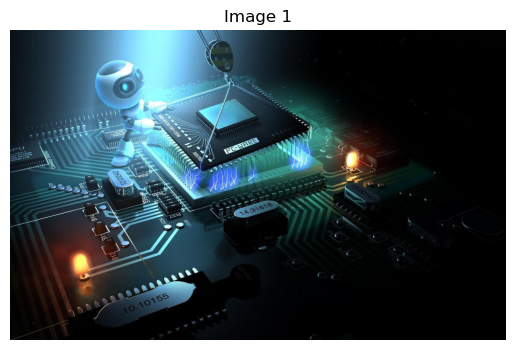

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List of image file paths
image_path = [
    'bg.jpg',
]

# Loop to display each image
for idx, image_path in enumerate(image_path):
    img = mpimg.imread(image_path)
    plt.figure()
    plt.imshow(img)
    plt.title(f'Image {idx + 1}')
    plt.axis('off')  # Hide the axes for better display
    plt.show()


# 02. PRINT THE MAXIMUM AND MINIMUM COORDINATES OF THE IMAGES 

In [5]:
import cv2
import numpy as np

# List of image file paths
image_paths = [
  'bg.jpg' 
]

# Initialize variables to store min and max pixel values
min_pixel_value = 255
max_pixel_value = 0

# Loop through each image
for image_path in image_paths:
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Grayscale to simplify the example

    # Update min and max pixel values
    min_pixel_value = min(min_pixel_value, np.min(image))
    max_pixel_value = max(max_pixel_value, np.max(image))

# Output the results
print(f'Minimum pixel value: {min_pixel_value}')
print(f'Maximum pixel value: {max_pixel_value}')


Minimum pixel value: 0
Maximum pixel value: 255



Since the Max coordinate and Min coordinate for any image is 0 and 255 respectively, python code is most preferable for obtaining coordinates. We can use Softwares like Image to obtain Min and Max coordinates since the accuracy of output is coparitively less and the time taken to manually obtain the coordinates, python code like the one in the above is used. 


For Example, the minimum and Maximum manually obtained from ImageJ is as nearly close to the code generated output, but the time taken to reach the near approximation is not appreciable 

# 04. RESIZING THE SET OF IMAGES

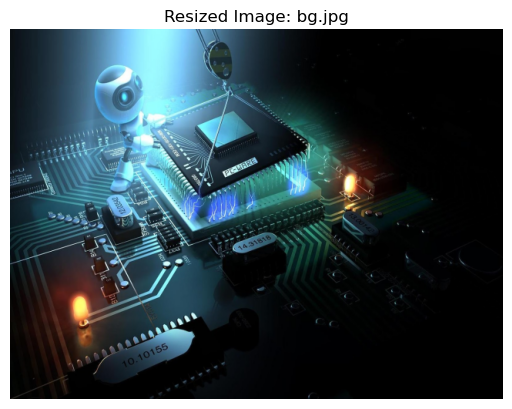

All images have been resized, saved to the 'resized_images' directory, and displayed.


In [9]:
import cv2
import os
import matplotlib.pyplot as plt

# Function to resize image
def resize_image(image_path, output_size):
    # Read the image
    image = cv2.imread(image_path)
    # Resize the image
    resized_image = cv2.resize(image, output_size, interpolation=cv2.INTER_AREA)
    return resized_image

# List of image file paths
image_paths = [
    'bg.jpg' 
]

# Desired output size (width, height)
output_size = (640, 480)  # Example dimensions

# Directory to save resized images
output_dir = 'resized_images'
os.makedirs(output_dir, exist_ok=True)

# Loop through each image, resize, save and display
for image_path in image_paths:
    # Resize the image
    resized_image = resize_image(image_path, output_size)
    # Get the image filename
    image_filename = os.path.basename(image_path)
    # Save the resized image to the output directory
    cv2.imwrite(os.path.join(output_dir, image_filename), resized_image)
    
    # Display the resized image
    plt.figure()
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Resized Image: {image_filename}')
    plt.axis('off')  # Hide the axes for better display
    plt.show()

print(f"All images have been resized, saved to the '{output_dir}' directory, and displayed.")


# 05. CONVERSION OF (R,G,B) SCALED IMAGES TO GRAYSCALED IMAGES

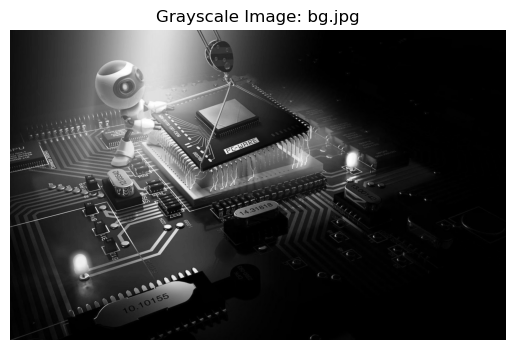

All images have been converted to grayscale, saved to the 'grayscale_images' directory, and displayed.


In [11]:
import cv2
import os
import matplotlib.pyplot as plt

# Function to convert an image to grayscale
def convert_to_grayscale(image_path, output_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Save the grayscale image to the output path
    cv2.imwrite(output_path, grayscale_image)
    return grayscale_image

# List of image file paths
image_paths = [
    'bg.jpg'
]

# Directory to save grayscale images
output_dir = 'grayscale_images'
os.makedirs(output_dir, exist_ok=True)

# Loop through each image, convert to grayscale, save, and display
for image_path in image_paths:
    # Get the image filename
    image_filename = os.path.basename(image_path)
    # Define the output path for the grayscale image
    output_path = os.path.join(output_dir, image_filename)
    # Convert the image to grayscale and save it
    grayscale_image = convert_to_grayscale(image_path, output_path)
    
    # Display the grayscale image
    plt.figure()
    plt.imshow(grayscale_image, cmap='gray')
    plt.title(f'Grayscale Image: {image_filename}')
    plt.axis('off')  # Hide the axes for better display
    plt.show()

print(f"All images have been converted to grayscale, saved to the '{output_dir}' directory, and displayed.")


# PURPOSE OF SCALING AND NORMALISING

**Scaling**
Uniformity: Ensures all images have the same dimensions, making it easier to compare and analyze them in a consistent manner.

Memory Efficiency: Reduces the size of large images, saving memory and improving processing speed.

Compatibility: Some algorithms and models require images of specific sizes, so scaling is necessary for compatibilihear about it!learning models.

**Normalizing**
Consistent Range: Scales pixel values to a standard range (e.g., 0 to 1), making it easier for algorithms to process the data uniformly.

Improved Convergence: Helps machine learning models to converge faster and more efficiently during training by stabilizing the learning process.

Reduced Redundancy: Normalizing can highlight significant features in the data by reducing the impact of varying lighting conditions and other noise.


# 06. HISTOGRAM

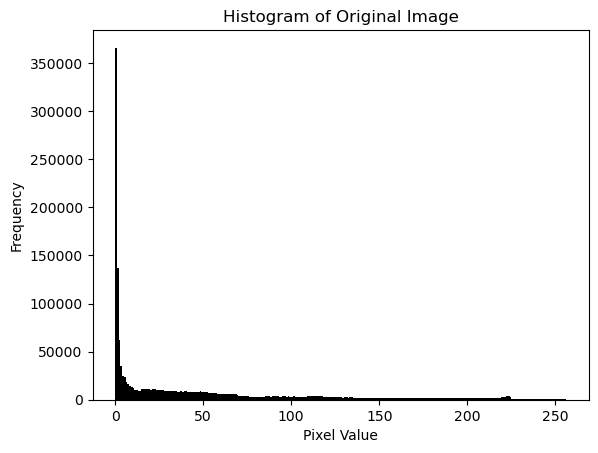

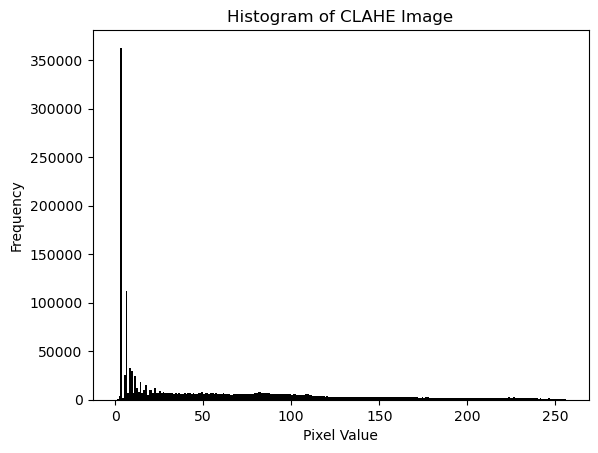

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread('bg.jpg', cv2.IMREAD_GRAYSCALE)

# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the image
cl1 = clahe.apply(image)

# Function to plot histogram
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# Display the original and CLAHE images
cv2.imshow('Original Image', image)
cv2.imshow('CLAHE Image', cl1)

# Plot histograms
plot_histogram(image, 'Histogram of Original Image')
plot_histogram(cl1, 'Histogram of CLAHE Image')

cv2.waitKey(0)
cv2.destroyAllWindows()

# PURPOSE OF HISTOGRAM 

Visualizing Intensity Distributions-
A histogram displays the distribution of pixel intensity values in an image. This visualization helps to understand the overall contrast, brightness, and intensity distribution of an image.

Image Enhancem-ent
Histograms aid in improving image quality through techniques like histogram equalization, which enhances contrast. This is particularly useful in medical imaging, satellite imagery, and photography.

Thresh-olding
In segmentation tasks, histograms help determine threshold values to separate objects from the background. By analyzing the histogram peaks and valleys, appropriate thresholds can be set for binary segmentation.

Feature E-xtraction
Histograms can be used to extract features for image recognition and classification tasks. For example, color histograms can represent the color distribution in an image, which can be a useful feature for object recognition.

Im-age Analysis
Histograms facilitate various image analysis tasks by providing insights into the intensity distribution, which helps in identifying anomalies, patterns, and important regions mage.

Applice, and urban planning.

**Applications in Computer Vision** 
Face Detection: Histograms of Oriented Gradients (HOG) are used to detect objects in images, including faces.

Medical Imaging: Enhancing the contrast of medical scans for better diagnosis.

Remote Sensing: Analyzing satellite images for environmental monitoring, agriculture, and urban planning.

# NOISING AND DE-NOISING 

**Noising Images:**

Algorithm Robustness: Adding noise helps test the robustness of image processing algorithms, ensuring they work well under varied conditions.

Synthetic Data Generation: Creates a larger dataset by simulating real-world conditions, which is useful in training machine learning models.

Benchmarking: Helps in benchmarking and comparing the performance of different algorithms.

**Denoising Images:**

Enhancing Quality: Removes unwanted distortions, improving the visual quality of images for better interpretation.

Preprocessing: Essential in preprocessing steps to ensure clean input data for further processing tasks like segmentation, detection, and classification.

Medical Imaging: Vital in medical imaging to enhance the clarity of images for accurate diagnosis.